### Assignment 3 - Time Series 

In [375]:
#Getting the required modules
import pandas_datareader.data as web
import datetime
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
#Get the stocks data

start= datetime.datetime(2012, 7, 31)
end = datetime.datetime(2017,6,30)
# Facebook
fb = web.DataReader('FB.US', 'quandl', start, end) 
# 3M
mmm = web.DataReader('MMM.US', 'quandl', start, end) 
# IBM
ibm = web.DataReader('IBM.US', 'quandl', start, end) 
# Amazon
amzn = web.DataReader('AMZN.US', 'quandl', start, end) 

##### Use of freq='BM' to record last business day in case last day of month falls over weekend. E.g. 2012, Sept 

In [333]:
month_end = pd.date_range(start='2012-07-31', end='2017-06-30', freq='BM')

In [334]:
#fb[fb.index.is_month_end].AdjClose.plot() == doesn't include business month end

fb_monthend = fb
fb_monthend = fb_monthend.reindex(month_end)
fb_monthend = fb_monthend.fillna(method='ffill')
#month_end used as index to align with business month ends.
fb_monthend.loc[month_end].AdjClose.head()

2012-07-31    21.710
2012-08-31    18.058
2012-09-28    21.660
2012-10-31    21.110
2012-11-30    28.000
Freq: BM, Name: AdjClose, dtype: float64

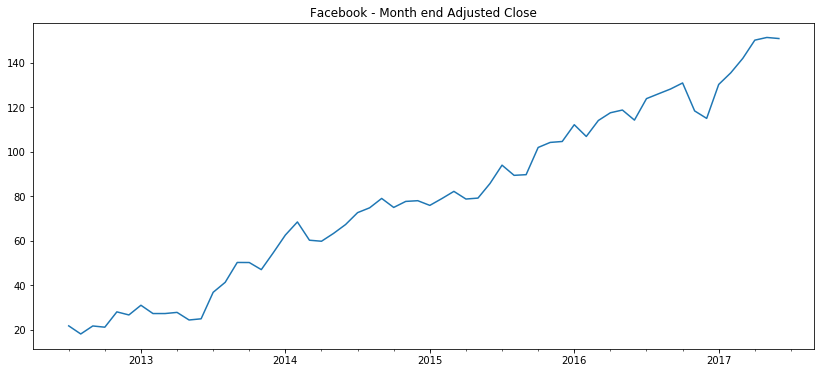

In [335]:
#month_end used as index to align with business month ends.
plt.subplots(figsize=(14, 6))
plt.title("Facebook - Month end Adjusted Close")
fb_monthend.loc[month_end].AdjClose.plot()

In [336]:
#mmm[mmm.index.is_month_end].AdjClose.plot() == doesn't include business month end
mmm_monthend = mmm
mmm_monthend = mmm_monthend.reindex(month_end)
mmm_monthend = mmm_monthend.fillna(method='ffill')
mmm_monthend.loc[month_end].AdjClose.head()

2012-07-31    80.117221
2012-08-31    81.838026
2012-09-28    81.678945
2012-10-31    77.419126
2012-11-30    80.912524
Freq: BM, Name: AdjClose, dtype: float64

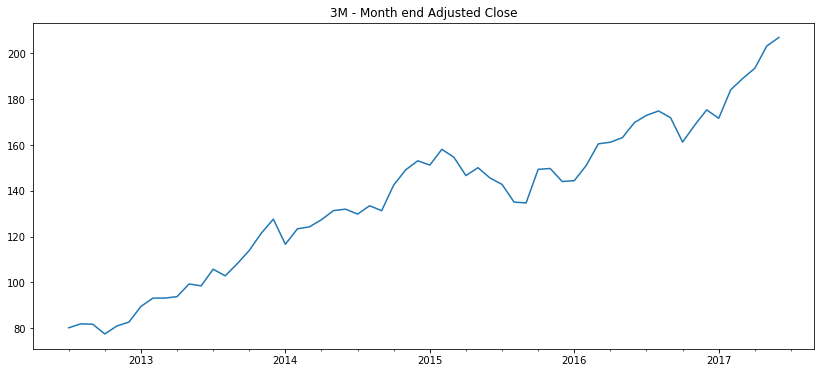

In [337]:
plt.subplots(figsize=(14, 6))
plt.title("3M - Month end Adjusted Close")
mmm_monthend.loc[month_end].AdjClose.plot()

In [338]:
#ibm[ibm.index.is_month_end].AdjClose.plot() == doesn't include business month end
ibm_monthend = ibm
ibm_monthend = ibm_monthend.reindex(month_end)
ibm_monthend = ibm_monthend.fillna(method='ffill')
ibm_monthend.loc[month_end].AdjClose.head()

2012-07-31    167.112403
2012-08-31    166.858424
2012-09-28    177.648345
2012-10-31    166.584394
2012-11-30    163.488846
Freq: BM, Name: AdjClose, dtype: float64

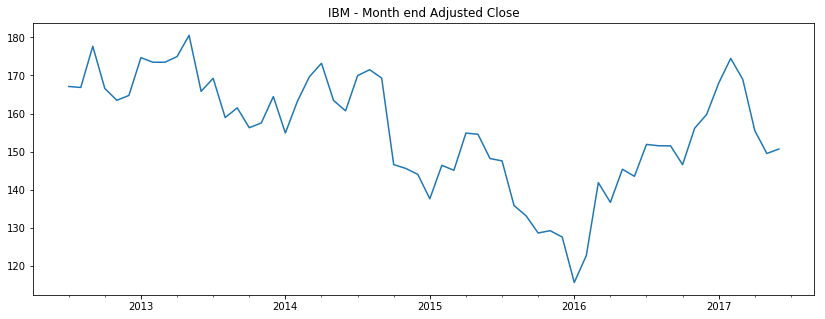

In [339]:
plt.subplots(figsize=(14, 5))
plt.title("IBM - Month end Adjusted Close")
ibm_monthend.loc[month_end].AdjClose.plot()

In [340]:
#amzn[amzn.index.is_month_end].AdjClose.plot() == doesn't include business month end
amzn_monthend = amzn
amzn_monthend = amzn_monthend.reindex(month_end)
amzn_monthend = amzn_monthend.fillna(method='ffill')
amzn_monthend.loc[month_end].AdjClose.head()

2012-07-31    233.3000
2012-08-31    248.2700
2012-09-28    254.3200
2012-10-31    232.8931
2012-11-30    252.0500
Freq: BM, Name: AdjClose, dtype: float64

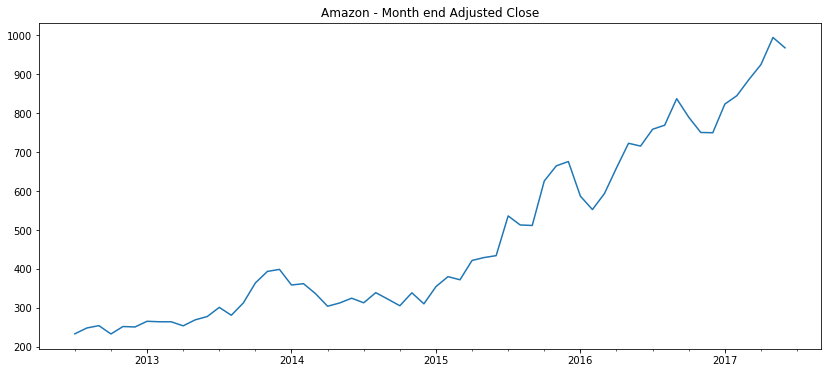

In [341]:
plt.subplots(figsize=(14, 6))
plt.title("Amazon - Month end Adjusted Close")
amzn_monthend.loc[month_end].AdjClose.plot()

In [342]:
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

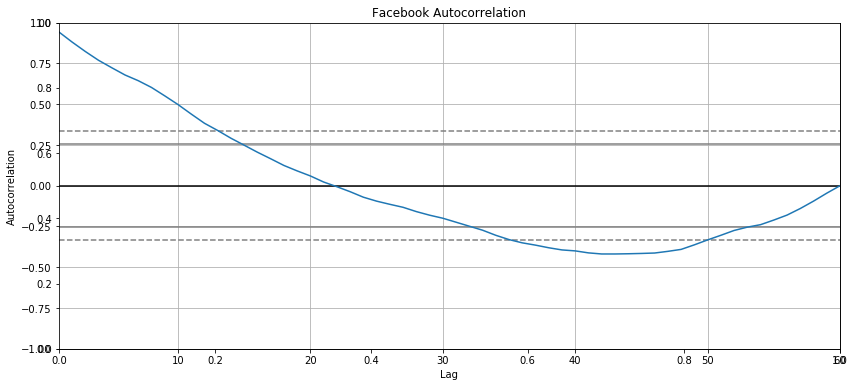

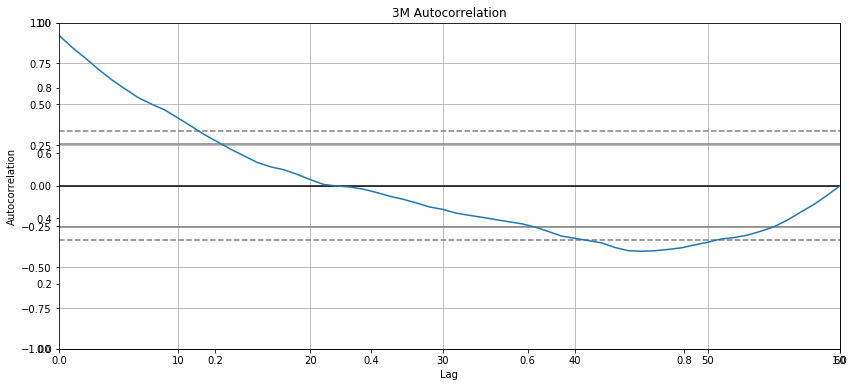

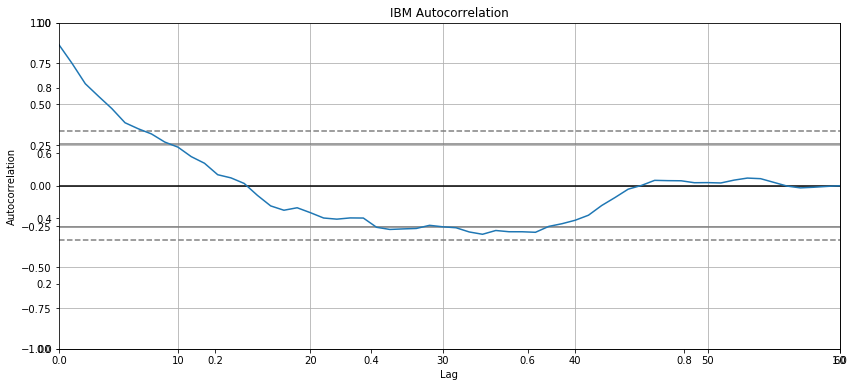

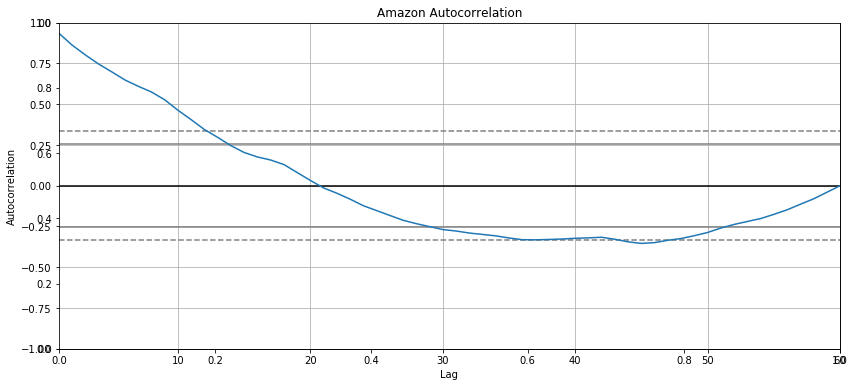

In [343]:
plt.subplots(figsize=(14, 6))
autocorrelation_plot(fb_monthend['AdjClose'])
plt.title("Facebook Autocorrelation")
plt.show()

plt.subplots(figsize=(14, 6))
autocorrelation_plot(mmm_monthend['AdjClose'])
plt.title("3M Autocorrelation")
plt.show()

plt.subplots(figsize=(14, 6))
autocorrelation_plot(ibm_monthend['AdjClose'])
plt.title("IBM Autocorrelation")
plt.show()

plt.subplots(figsize=(14, 6))
autocorrelation_plot(amzn_monthend['AdjClose'])
plt.title("Amazon Autocorrelation")
plt.show()

#### From above autocorrelation graphs for monthly Adjusted Close for all the stocks it is evident that most of values are non-zero which means high degree of autocorrelation between adjacent and near-adjacent observations. Most of the values lie within 95%and 99% confidence intervals. 

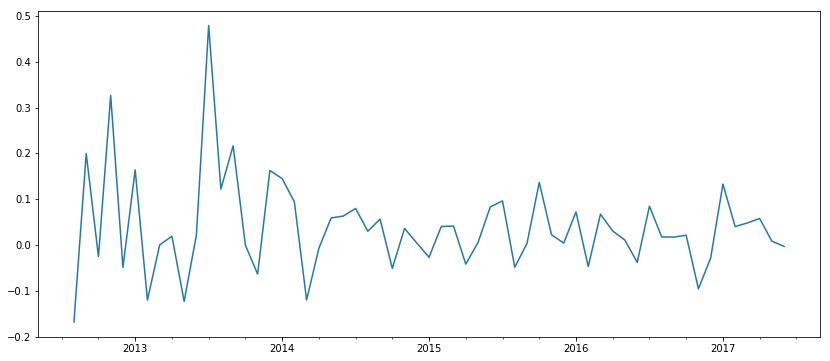

In [344]:
plt.subplots(figsize=(14, 6))
fb_returns = fb_monthend.AdjClose / fb_monthend.AdjClose.shift(1) - 1
#We can use pct_change()
#fb_returns = fb_monthend.AdjClose.pct_change()
fb_returns.plot()

In [345]:
fb_returns[fb_returns.notnull()].size

59

In [346]:
fb_returns.head()

2012-07-31         NaN
2012-08-31   -0.168217
2012-09-28    0.199468
2012-10-31   -0.025392
2012-11-30    0.326386
Freq: BM, Name: AdjClose, dtype: float64

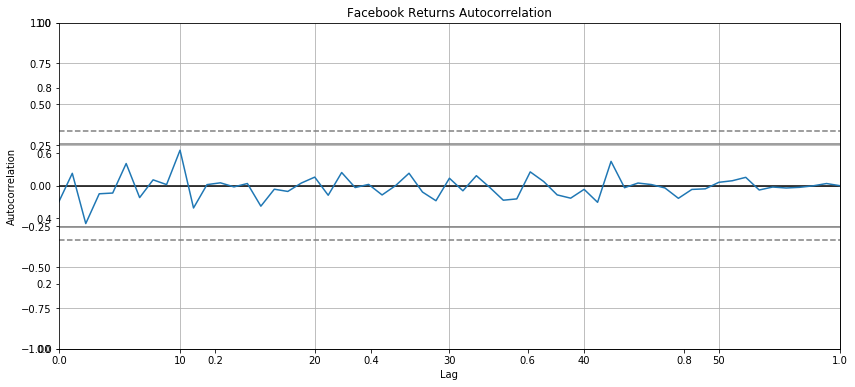

In [347]:
plt.subplots(figsize=(14, 6))
autocorrelation_plot(fb_returns[fb_returns.notnull()])
plt.title("Facebook Returns Autocorrelation")
plt.show()

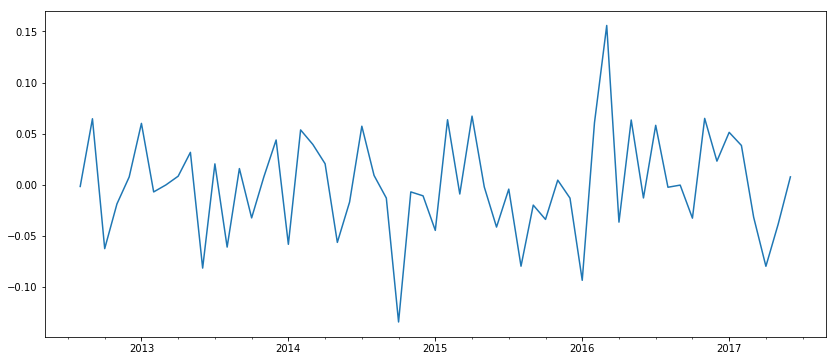

In [348]:
plt.subplots(figsize=(14, 6))
ibm_returns = ibm_monthend.AdjClose / ibm_monthend.AdjClose.shift(1) - 1
#ibm_returns = ibm_monthend.AdjClose.pct_change()
ibm_returns.plot()

In [349]:
ibm_returns[~ibm_returns.isnull()].size

59

In [350]:
ibm_returns.head()

2012-07-31         NaN
2012-08-31   -0.001520
2012-09-28    0.064665
2012-10-31   -0.062280
2012-11-30   -0.018582
Freq: BM, Name: AdjClose, dtype: float64

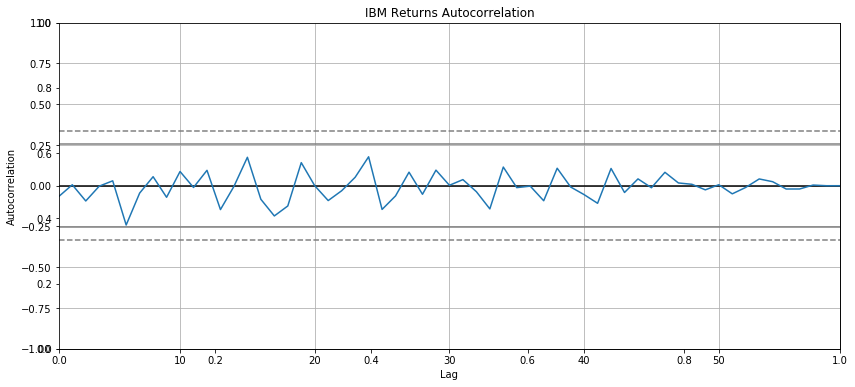

In [351]:
plt.subplots(figsize=(14, 6))
autocorrelation_plot(ibm_returns[ibm_returns.notnull()])
plt.title("IBM Returns Autocorrelation")
plt.show()

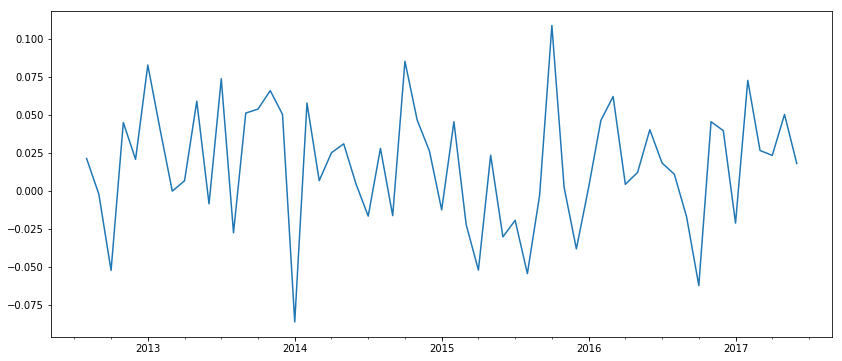

In [352]:
plt.subplots(figsize=(14, 6))
mmm_returns = mmm_monthend.AdjClose / mmm_monthend.AdjClose.shift(1) - 1
#ibm_returns = ibm_monthend.AdjClose.pct_change()
mmm_returns.plot()

In [353]:
mmm_returns[~mmm_returns.isnull()].size

59

In [354]:
mmm_returns.head()

2012-07-31         NaN
2012-08-31    0.021479
2012-09-28   -0.001944
2012-10-31   -0.052153
2012-11-30    0.045123
Freq: BM, Name: AdjClose, dtype: float64

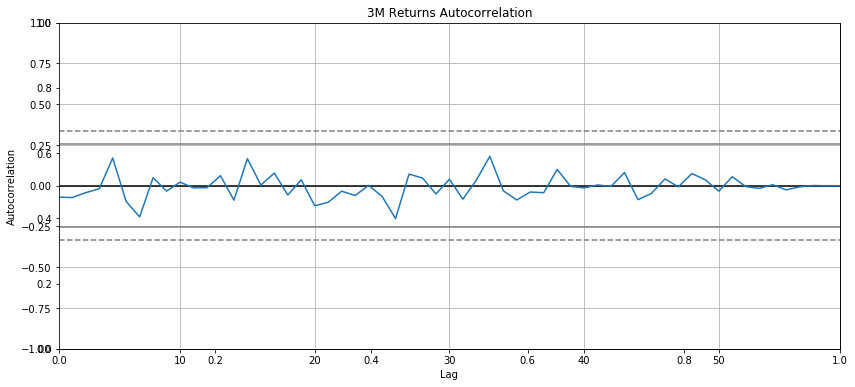

In [355]:
plt.subplots(figsize=(14, 6))
autocorrelation_plot(mmm_returns[mmm_returns.notnull()])
plt.title("3M Returns Autocorrelation")
plt.show()

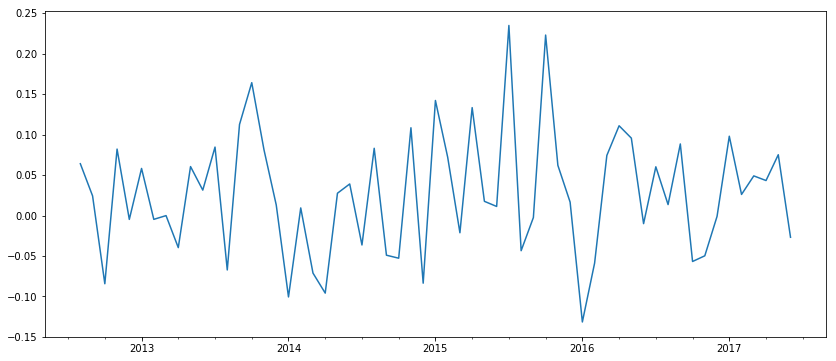

In [356]:
plt.subplots(figsize=(14, 6))
amzn_returns = amzn_monthend.AdjClose / amzn_monthend.AdjClose.shift(1) - 1
#amzn_returns = amzn_returns.AdjClose.pct_change()
amzn_returns.plot()

In [357]:
amzn_returns[~amzn_returns.isnull()].size

59

In [358]:
amzn_returns.head()

2012-07-31         NaN
2012-08-31    0.064166
2012-09-28    0.024369
2012-10-31   -0.084252
2012-11-30    0.082256
Freq: BM, Name: AdjClose, dtype: float64

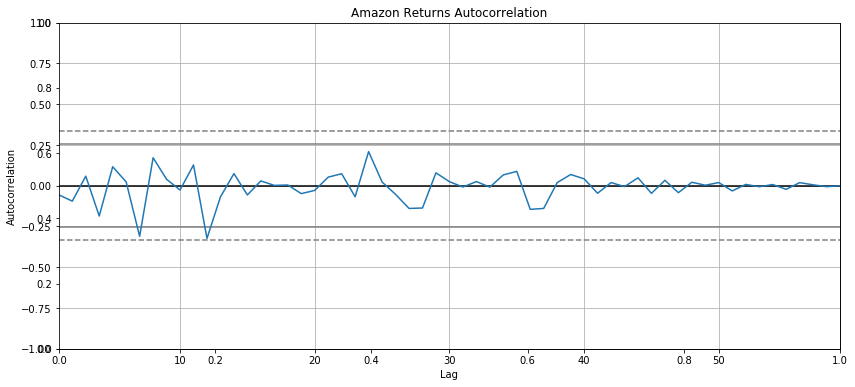

In [359]:
plt.subplots(figsize=(14, 6))
autocorrelation_plot(amzn_returns[amzn_returns.notnull()])
plt.title("Amazon Returns Autocorrelation")
plt.show()

#### From above autocorrelation graphs for monthly returns for all the stocks it is evident that most of values are non-zero and small and lie within 95%and 99% confidence intervals indicating very low degree of auto correlation.



#### Scatter Plot for all stocks' returns

In [368]:
fb_returns.name = 'Facebook'
mmm_returns.name = '3M'
ibm_returns.name = 'IBM'
amzn_returns.name = 'Amazon'

In [369]:
All_companies = pd.concat([fb_returns, mmm_returns, ibm_returns, amzn_returns], axis=1)

In [370]:
All_companies.head()

,Facebook,3M,IBM,Amazon
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,-0.168217,0.021479,-0.001520,0.064166
2012-09-28,0.199468,-0.001944,0.064665,0.024369
2012-10-31,-0.025392,-0.052153,-0.062280,-0.084252
2012-11-30,0.326386,0.045123,-0.018582,0.082256


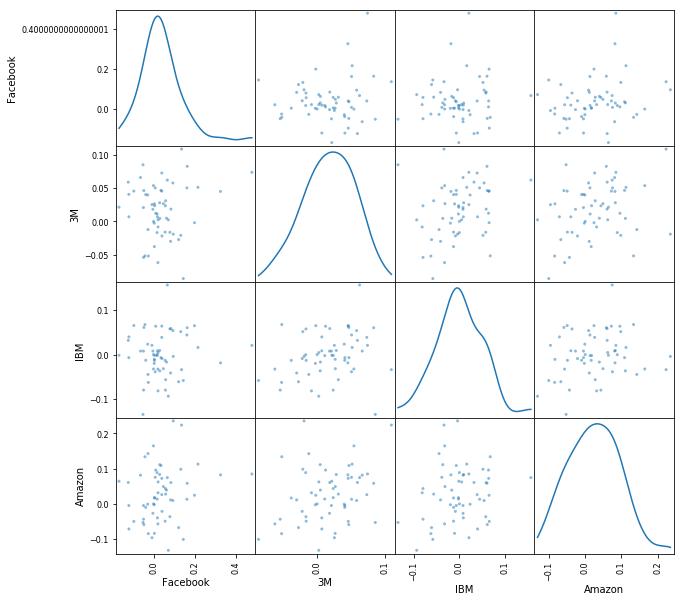

In [371]:
pd.plotting.scatter_matrix(All_companies, diagonal='kde', figsize=(10, 10));



#### Visualizing the correlation between all stocks returns

In [372]:
correl = All_companies.corr()
correl

,Facebook,3M,IBM,Amazon
Facebook,1.000000,0.109220,0.070102,0.222844
3M,0.109220,1.000000,0.249874,0.303376
IBM,0.070102,0.249874,1.000000,0.189989
Amazon,0.222844,0.303376,0.189989,1.000000


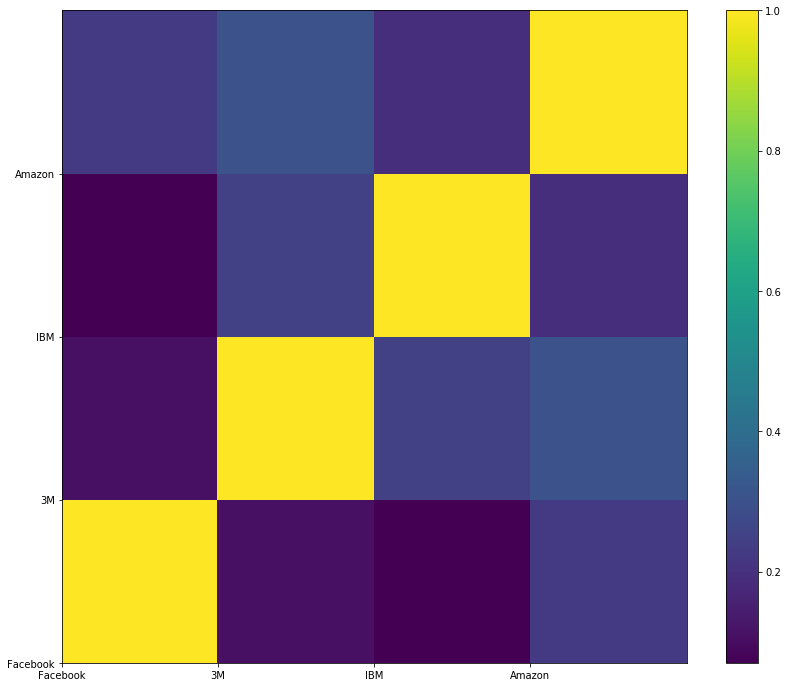

In [373]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
plt.figure(figsize = (14,12)) 
pcolor(correl)
colorbar()
plt.xticks(range(len(correl)), correl.columns)
plt.yticks(range(len(correl)), correl.columns)
show()

#### Alternatively seaborn heatmap can be used to visualize correlation

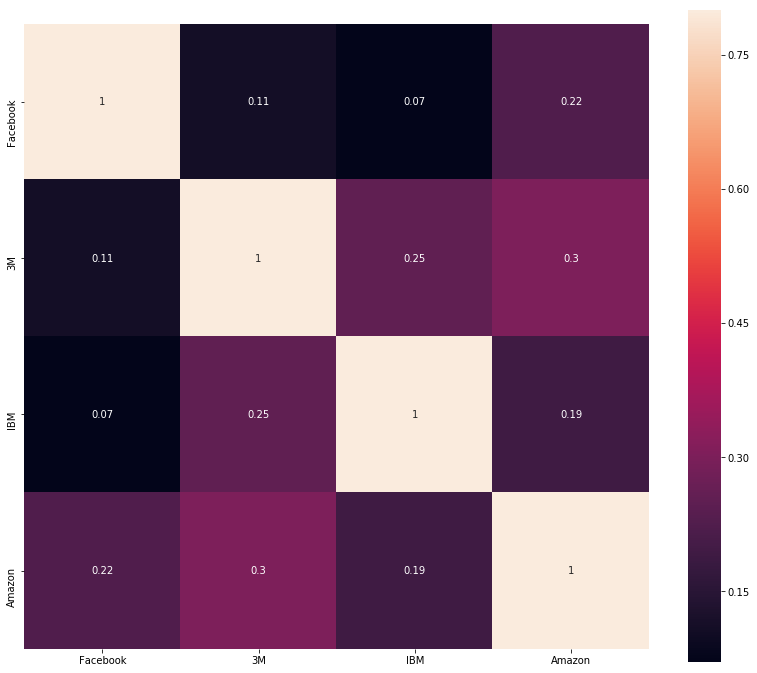

In [374]:
plt.figure(figsize = (14,12))
import seaborn as sns
sns.heatmap(correl, vmax=0.8, square=True, annot=True)